In [2]:
# Get the data for expeirment
import sklearn
import pandas as pd 
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.rcParams.update({'font.size': 20})

In [2]:
# Read the data set
df = pd.read_csv('Data/FES/Raw/SolarPrediction.csv', header=0)

In [3]:
# The weather sensor data should be the input data
print(len(df))
df

32686


,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


In [4]:
# Check all columns, some are not instantly understandable
df.columns

Index(['UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature', 'Pressure',
       'Humidity', 'WindDirection(Degrees)', 'Speed', 'TimeSunRise',
       'TimeSunSet'],
      dtype='object')

In [20]:
# Add engineering features
# instead of using the time zone, adjust the convertion by a time delta manually
# inspreied and modified from source: https://www.kaggle.com/code/callumdownie/hi-seas-solar-irradiance-prediction

new_df = df.copy()
new_df['date'] = pd.to_datetime(new_df['UNIXTime'],unit='s') - pd.Timedelta('10:00:00')

In [21]:
new_df.head(50)

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,date
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,2016-09-29 23:55:26
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,2016-09-29 23:50:23
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,2016-09-29 23:45:26
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,2016-09-29 23:40:21
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,2016-09-29 23:35:24
5,1475227824,9/29/2016 12:00:00 AM,23:30:24,1.21,48,30.46,64,120.20,5.62,06:13:00,18:13:00,2016-09-29 23:30:24
6,1475227519,9/29/2016 12:00:00 AM,23:25:19,1.20,49,30.46,72,112.45,6.75,06:13:00,18:13:00,2016-09-29 23:25:19
7,1475227222,9/29/2016 12:00:00 AM,23:20:22,1.24,49,30.46,71,122.97,5.62,06:13:00,18:13:00,2016-09-29 23:20:22
8,1475226922,9/29/2016 12:00:00 AM,23:15:22,1.23,49,30.46,80,101.18,4.50,06:13:00,18:13:00,2016-09-29 23:15:22
9,1475226622,9/29/2016 12:00:00 AM,23:10:22,1.21,49,30.46,85,141.87,4.50,06:13:00,18:13:00,2016-09-29 23:10:22


In [25]:
new_df['hour'] = new_df['date'].dt.hour
new_df['minute'] = new_df['date'].dt.minute

In [26]:
column_to_use = [
'Radiation', 'Temperature', 'Pressure',
       'Humidity', 'WindDirection(Degrees)', 'Speed', 'hour', 'minute']

In [27]:
# No null values
print(df.isnull().sum())

df_processed = new_df[column_to_use]

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64


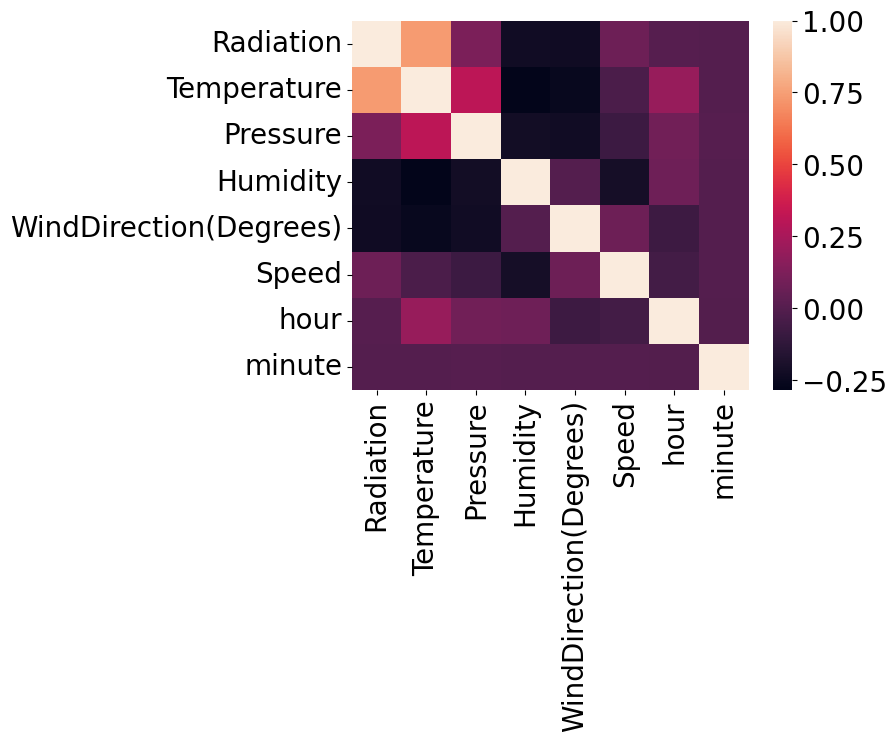

In [28]:
_ = sns.heatmap(df_processed.corr())

In [3]:
df_processed.to_csv('Data\FES\processed_solar_radiation.csv', sep = ',', index = False)

NameError: name 'df_processed' is not defined

In [4]:
# Read the processeed data
data = pd.read_csv('Data/FES/processed_solar_radiation.csv')

x = data.drop(columns=['Radiation'])
y = data['Radiation']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [6]:
x_train.to_csv('Data/FES/processed_solar_radiation_x_train.csv', sep = ',', index = False)
x_test.to_csv('Data/FES/processed_solar_radiation_x_test.csv', sep = ',', index = False)
y_train.to_csv('Data/FES/processed_solar_radiation_y_train.csv', sep = ',', index = False)
y_test.to_csv('Data/FES/processed_solar_radiation_y_test.csv', sep = ',', index = False)